# 회귀를 이용한 예측: 차원축소

### PCA 기반 PCR 분석에 적합한 데이터셋은 어떤 특징을 가지고 있어야 하는가?
1. **설명변수 간의 다중공선성이 높은 데이터셋**
* 설명변수들 간의 상관관계가 높아서 선형회귀분석을 하면 문제가 발생하는 경우
* PCA를 통해 이렇게 높은 상관관계를 제거하고, 주성분으로 차원을 축소한 후 회귀분석을 수행할 수 있다.
2. **고차원 데이터셋 (Feature가 많은 경우)**
* 설명변수[Feature]의 수가 많아서 차원축소가 필요할 때
* 데이터의 차원이 너무 많으면 과적합(overfitting) 문제가 발생할 수 있으므로, PCA를 활용해 주성분만 선택할 수 있다.
3. **연속형 반응변수를 가진 데이터셋**
* 예측하려는 변수[반응변수]가 연속적인 값을 가진 경우

### PLS 분석에 적합한 데이터셋은 어떤 특징을 가지고 있어야 하는가?
1. **설명변수 간의 다중공선성이 높은 데이터셋**
* PLS는 설명변수들 간에 높은 상관관계(다중공선성)가 존재할 때 유용하다.
* 다중공선성이 심한 경우, 전통적 다중회귀에서는 회귀계수 추정이 불안정해질 수 있는데, PLS는 잠재 변수(components)를 통해 이러한 문제를 완화한다.
2. **고차원 데이터셋**
* 설명변수의 수(p)가 관측치의 수(n)보다 많거나, 두 수가 비슷한 경우에도 PLS는 효과적으로 작동한다.
* 고차원 상황에서 차원 축소와 예측력을 동시에 확보할 수 있는 장점이 있다.
3. **예측과 설명 모두에 관심**
* PLS는 X와 Y의 공분산 구조를 고려하여 잠재 변수를 추출하기 때문에, 예측력 뿐만 아니라 변수들 간의 관계(해석)를 동시에 살펴보고자 할 때 유리하다.
* 특히 다변량 반응변수(multivariate Y)를 다룰 때 유용하다.
4. **연속형 변수를 가진 데이터셋**
* 기본적인 PLS 분석은 연속형 데이터에 대해 적용된다.
* 만약 범주형 변수가 포함되어 있다면, 적절한 인코딩(예: 원-핫 인코딩)을 거친 후 적용해야 한다.
5. **데이터의 스케일 차이가 존재하는 경우**
* 설명변수와 반응변수 모두 서로 다른 단위나 범위를 가질 수 있기 때문에, 분석 전에 중심화 및 스케일링(정규화)을 수행하는 것이 일반적이다.
* 스케일링은 각 변수의 기여도를 균등하게 반영하게 하여, 잠재변수 추출이 왜곡되지 않도록 한다.
6. **노이즈와 이상치**
* PLS는 노이즈가 존재하는 데이터에서도 잠재변수 추출을 통해 신호를 잡아내는 데 유리하지만, 극단적인 이상치가 존재하면 모형에 영향을 줄 수 있으므로 사전에 이상치 처리가 필요하다.
7. **부분적 선형 관계**
* 기본 PLS 모형은 선형 관계를 가정한다.
* 따라서 X와 Y 간에 어느 정도 선형 혹은 선형으로 근사 가능한 관계가 존재하면, PLS가 효과적으로 작동한다.

### PCR 분석에 적합한 데이터셋의 예시
1. **Boston Housing Dataset**
2. **California Housing Dataset**
3. **Wine Quality Dataset**
4. **Energy Efficiency Dataset(건물 에너지 효율 예측)**
- https://archive.ics.uci.edu/dataset/242/energy+efficiency

### Energy Efficiency Dataset을 사용해 보자.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

In [3]:
df = pd.read_excel(url)   # [Q] pandas 라이브러리의 read_excel() 함수를 적용한 df의 type은 무엇일까?

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape   # [Q] df에는 몇 개의 샘플과 변수가 있을까? 변수들을 Features와 target으로 구분해 보자.

(768, 10)

In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
df.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height",
              "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]   # 변수명을 부여

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
df.Orientation
#df['Orientation']

0      2
1      3
2      4
3      5
4      2
      ..
763    5
764    2
765    3
766    4
767    5
Name: Orientation, Length: 768, dtype: int64

In [10]:
df.Orientation.unique()
#df['Orientation'].unique()

array([2, 3, 4, 5], dtype=int64)

In [11]:
df['Glazing Area Distribution']

0      0
1      0
2      0
3      0
4      0
      ..
763    5
764    5
765    5
766    5
767    5
Name: Glazing Area Distribution, Length: 768, dtype: int64

In [12]:
df['Glazing Area Distribution'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [13]:
df.head(30)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [14]:
df['Overall Height']

0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
      ... 
763    3.5
764    3.5
765    3.5
766    3.5
767    3.5
Name: Overall Height, Length: 768, dtype: float64

In [15]:
df['Overall Height'].unique()

array([7. , 3.5])

In [16]:
df['Glazing Area']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
763    0.4
764    0.4
765    0.4
766    0.4
767    0.4
Name: Glazing Area, Length: 768, dtype: float64

In [17]:
df['Glazing Area'].unique()

array([0.  , 0.1 , 0.25, 0.4 ])

In [18]:
df_encoded = pd.get_dummies(df, columns=['Orientation', 'Glazing Area Distribution'], drop_first=True)

In [19]:
df_encoded.head(30)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load,Orientation_3,Orientation_4,Orientation_5,Glazing Area Distribution_1,Glazing Area Distribution_2,Glazing Area Distribution_3,Glazing Area Distribution_4,Glazing Area Distribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,False,False,False,False,False,False,False
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,True,False,False,False,False,False,False,False
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,True,False,False,False,False,False,False
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,False,True,False,False,False,False,False
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,False,False,False,False,False,False,False,False
5,0.90,563.5,318.5,122.50,7.0,0.0,21.46,25.38,True,False,False,False,False,False,False,False
6,0.90,563.5,318.5,122.50,7.0,0.0,20.71,25.16,False,True,False,False,False,False,False,False
7,0.90,563.5,318.5,122.50,7.0,0.0,19.68,29.60,False,False,True,False,False,False,False,False
8,0.86,588.0,294.0,147.00,7.0,0.0,19.50,27.30,False,False,False,False,False,False,False,False
9,0.86,588.0,294.0,147.00,7.0,0.0,19.95,21.97,True,False,False,False,False,False,False,False


In [20]:
Orientation_columns = [col for col in df_encoded.columns if col.startswith('Orientation_')]
Orientation_corr = df_encoded[Orientation_columns].corr()

print("Orientation 관련 더미 변수들 간의 상관계수:")
print(Orientation_corr)

Orientation 관련 더미 변수들 간의 상관계수:
               Orientation_3  Orientation_4  Orientation_5
Orientation_3       1.000000      -0.333333      -0.333333
Orientation_4      -0.333333       1.000000      -0.333333
Orientation_5      -0.333333      -0.333333       1.000000


In [21]:
GAD_columns = [col for col in df_encoded.columns if col.startswith('Glazing Area Distribution_')]
GAD_corr = df_encoded[GAD_columns].corr()

print("Glazing Area Distribution 관련 더미 변수들 간의 상관계수:")
print(GAD_corr)

Glazing Area Distribution 관련 더미 변수들 간의 상관계수:
                             Glazing Area Distribution_1  \
Glazing Area Distribution_1                     1.000000   
Glazing Area Distribution_2                    -0.230769   
Glazing Area Distribution_3                    -0.230769   
Glazing Area Distribution_4                    -0.230769   
Glazing Area Distribution_5                    -0.230769   

                             Glazing Area Distribution_2  \
Glazing Area Distribution_1                    -0.230769   
Glazing Area Distribution_2                     1.000000   
Glazing Area Distribution_3                    -0.230769   
Glazing Area Distribution_4                    -0.230769   
Glazing Area Distribution_5                    -0.230769   

                             Glazing Area Distribution_3  \
Glazing Area Distribution_1                    -0.230769   
Glazing Area Distribution_2                    -0.230769   
Glazing Area Distribution_3                     1.000

In [22]:
df_encoded.describe()   # 변수별 요약통계량을 확인해 보자. => 연속형 변수들에 대해서만 요약통계량이 계산된다.

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정: Windows의 경우 'Malgun Gothic' 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

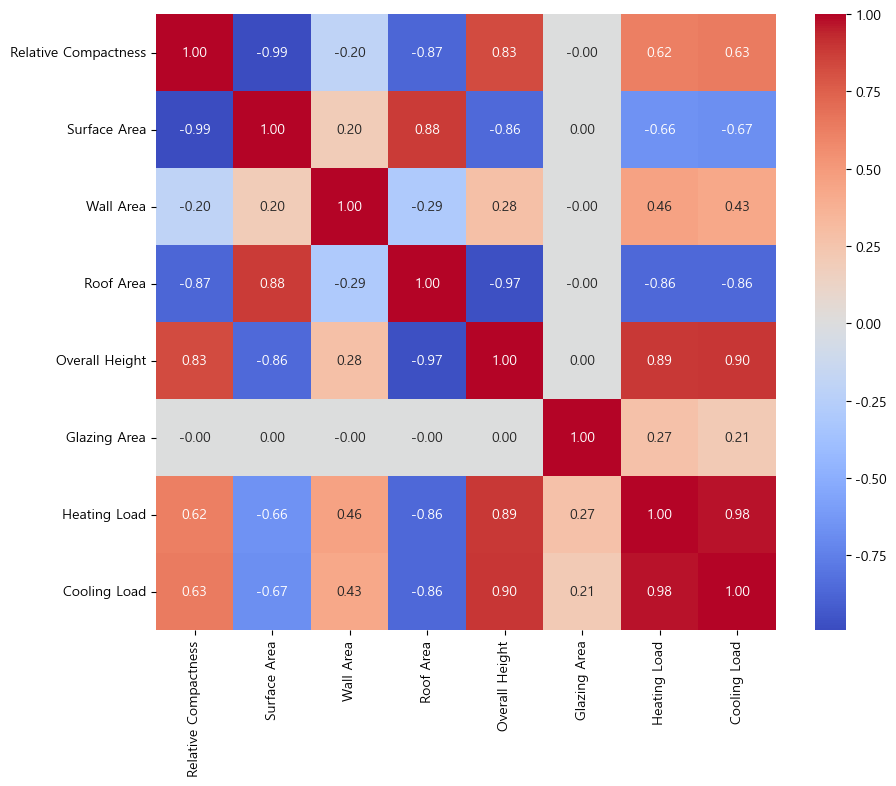

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.iloc[:, :8].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

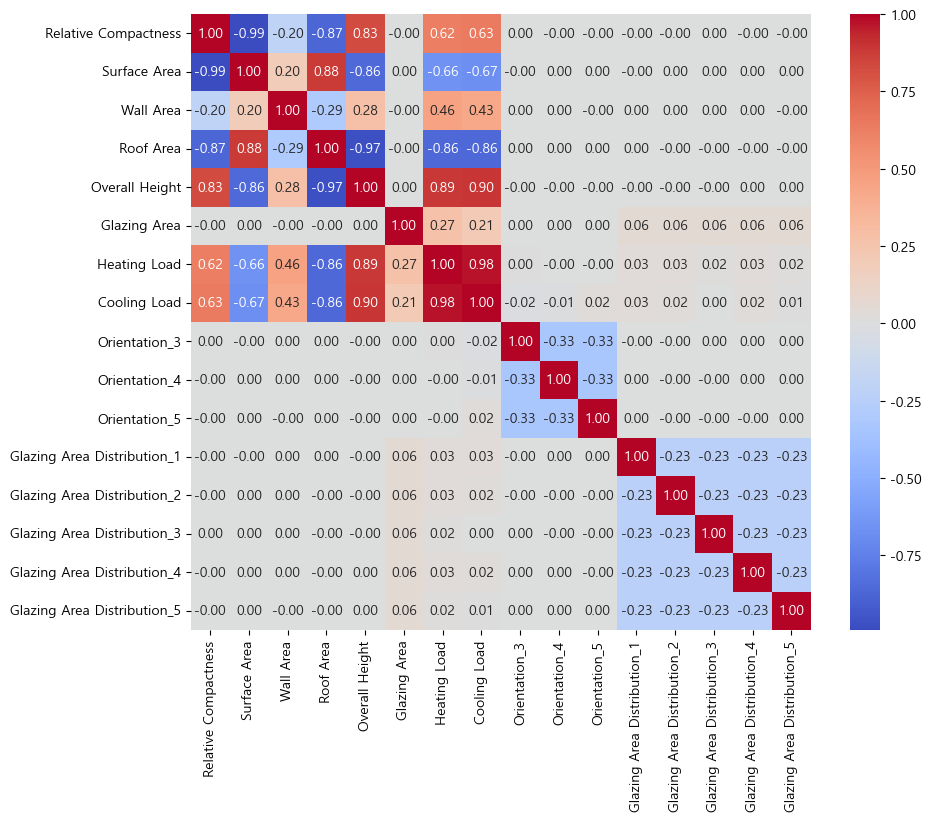

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## PCA

In [26]:
df_encoded.shape

(768, 16)

In [27]:
df_encoded.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area', 'Heating Load', 'Cooling Load',
       'Orientation_3', 'Orientation_4', 'Orientation_5',
       'Glazing Area Distribution_1', 'Glazing Area Distribution_2',
       'Glazing Area Distribution_3', 'Glazing Area Distribution_4',
       'Glazing Area Distribution_5'],
      dtype='object')

In [28]:
y = df_encoded['Heating Load']

In [29]:
X = df_encoded.drop(columns=['Heating Load', 'Cooling Load'])

In [30]:
X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Orientation_3,Orientation_4,Orientation_5,Glazing Area Distribution_1,Glazing Area Distribution_2,Glazing Area Distribution_3,Glazing Area Distribution_4,Glazing Area Distribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,False,False,False,False,False,False,False,False
1,0.98,514.5,294.0,110.25,7.0,0.0,True,False,False,False,False,False,False,False
2,0.98,514.5,294.0,110.25,7.0,0.0,False,True,False,False,False,False,False,False
3,0.98,514.5,294.0,110.25,7.0,0.0,False,False,True,False,False,False,False,False
4,0.90,563.5,318.5,122.50,7.0,0.0,False,False,False,False,False,False,False,False


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
y.shape, y.ndim

((768,), 1)

In [33]:
Y = y.values.reshape(-1, 1)

In [34]:
Y.shape, Y.ndim

((768, 1), 2)

In [35]:
X.shape, X.ndim

((768, 14), 2)

In [36]:
# 데이터 스케일링 (PCA는 변수 크기에 민감하므로 표준화 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)   # 반응변수 y에 대한 정규화는 PCA와 PCR 분석에서는 필요하지 않지만, PLS 분석을 위해 미리 해둔다.

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca_full = PCA()                                # 14개 components 모두를 대상으로 PCA 분석을 수행하는 경우
X_pca_full = pca_full.fit_transform(X_scaled)

In [39]:
# 각 주성분이 설명하는 분산 비율 계산
explained_variance_full = pca_full.explained_variance_ratio_
cumulative_variance_full = np.cumsum(explained_variance_full)

In [40]:
print(explained_variance_full)

[2.64495663e-01 9.52380952e-02 9.52380952e-02 8.85608079e-02
 8.79120879e-02 8.79120879e-02 8.79120879e-02 8.79120879e-02
 7.26362807e-02 2.38095238e-02 4.28679624e-03 3.76813479e-03
 3.18250928e-04 3.93516987e-17]


In [41]:
print(cumulative_variance_full)

[0.26449566 0.35973376 0.45497185 0.54353266 0.63144475 0.71935684
 0.80726893 0.89518101 0.96781729 0.99162682 0.99591361 0.99968175
 1.         1.        ]


In [42]:
# 주성분별 설명된 분산 출력
for i, (ev, cum_ev) in enumerate(zip(explained_variance_full, cumulative_variance_full), start=1):
    print(f"Principal Component {i}: 설명된 분산 비율 = {ev:.4f}, 누적 = {cum_ev:.4f}")

# enumerate()의 start 옵션: 반환되는 인덱스의 시작값을 지정하는 역할

Principal Component 1: 설명된 분산 비율 = 0.2645, 누적 = 0.2645
Principal Component 2: 설명된 분산 비율 = 0.0952, 누적 = 0.3597
Principal Component 3: 설명된 분산 비율 = 0.0952, 누적 = 0.4550
Principal Component 4: 설명된 분산 비율 = 0.0886, 누적 = 0.5435
Principal Component 5: 설명된 분산 비율 = 0.0879, 누적 = 0.6314
Principal Component 6: 설명된 분산 비율 = 0.0879, 누적 = 0.7194
Principal Component 7: 설명된 분산 비율 = 0.0879, 누적 = 0.8073
Principal Component 8: 설명된 분산 비율 = 0.0879, 누적 = 0.8952
Principal Component 9: 설명된 분산 비율 = 0.0726, 누적 = 0.9678
Principal Component 10: 설명된 분산 비율 = 0.0238, 누적 = 0.9916
Principal Component 11: 설명된 분산 비율 = 0.0043, 누적 = 0.9959
Principal Component 12: 설명된 분산 비율 = 0.0038, 누적 = 0.9997
Principal Component 13: 설명된 분산 비율 = 0.0003, 누적 = 1.0000
Principal Component 14: 설명된 분산 비율 = 0.0000, 누적 = 1.0000


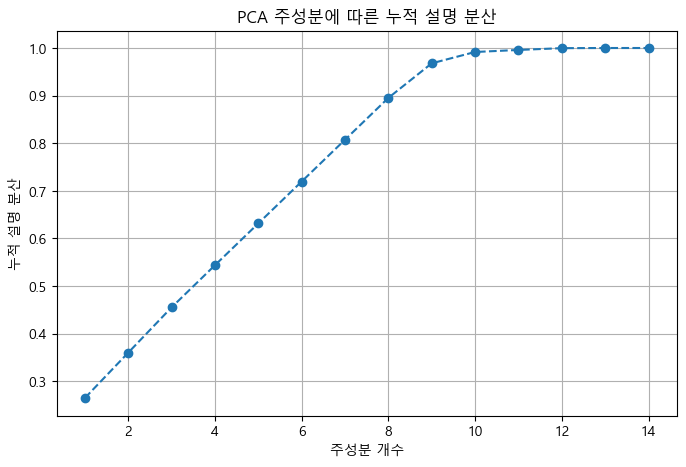

In [43]:
# 누적 설명된 분산 시각화
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance_full)+1), cumulative_variance_full, marker='o', linestyle='--')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산')
plt.title('PCA 주성분에 따른 누적 설명 분산')
plt.grid(True)
plt.show()

In [44]:
# 14개의 주성분 중, 설명력을 95% 이상 유지하는 차원 선택
pca_95 = PCA(n_components=0.95)   # 누적 설명 분산 비율이 95% 이상이 되도록 자동 선택
X_pca = pca_95.fit_transform(X_scaled)

In [45]:
# 주성분 개수 확인
print(f"선택된 주성분 개수: {pca_95.n_components_}")

선택된 주성분 개수: 9


## PCR

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [48]:
# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# 예측 및 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score : {r2:.2f}")

Mean Squared Error (MSE): 13.85
R2 Score : 0.87


## PLS

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_decomposition import PLSRegression

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(614, 14)

In [54]:
X_train.shape[1]

14

In [55]:
# 최적의 PLS 주성분(n_components) 선택을 위한 교차 검증
# 가능한 주성분 개수는 1부터 설명변수 개수(여기서는 14)까지 고려합니다.
mse_cv = []
n_components_range = range(1, X_train.shape[1] + 1)

In [56]:
print(n_components_range[0], n_components_range[-1])

1 14


In [57]:
for n in n_components_range:
    pls_temp = PLSRegression(n_components=n)
    # 10-Fold Cross-Validation에서 음의 평균 제곱 오차를 구한다
    scores = cross_val_score(pls_temp, X_train, Y_train, cv=10, scoring="neg_mean_squared_error")
    mse_cv.append(-np.mean(scores))
    print(f"n_components = {n}, 교차 검증 MSE = {-np.mean(scores):.4f}")

n_components = 1, 교차 검증 MSE = 0.2305
n_components = 2, 교차 검증 MSE = 0.1147
n_components = 3, 교차 검증 MSE = 0.1087
n_components = 4, 교차 검증 MSE = 0.0857
n_components = 5, 교차 검증 MSE = 0.0806
n_components = 6, 교차 검증 MSE = 0.0797
n_components = 7, 교차 검증 MSE = 0.0798
n_components = 8, 교차 검증 MSE = 0.0795
n_components = 9, 교차 검증 MSE = 0.0796
n_components = 10, 교차 검증 MSE = 0.0795
n_components = 11, 교차 검증 MSE = 0.0787
n_components = 12, 교차 검증 MSE = 0.0787
n_components = 13, 교차 검증 MSE = 0.0787
n_components = 14, 교차 검증 MSE = 630797.0764


In [58]:
mse_cv

[0.2304562443449322,
 0.11469259720643758,
 0.1086545624576892,
 0.08573230363875492,
 0.08063743972975178,
 0.07967804297294306,
 0.0798477113884903,
 0.07945345680773544,
 0.07958060169482654,
 0.07947221065588932,
 0.078716549056665,
 0.07873487818277654,
 0.07873489844756278,
 630797.0763546398]

In [59]:
np.argmin(mse_cv)

10

In [60]:
# 최적의 주성분 개수 선택 (MSE가 최소일 때)
optimal_n = np.argmin(mse_cv) + 1
print("\n최적의 주성분 개수:", optimal_n)


최적의 주성분 개수: 11


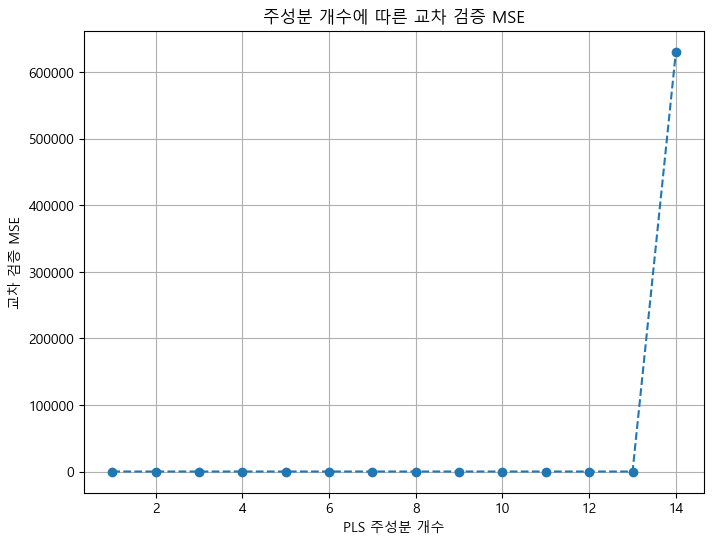

In [61]:
# 주성분 개수에 따른 교차 검증 MSE 시각화
plt.figure(figsize=(8,6))
plt.plot(n_components_range, mse_cv, marker='o', linestyle='--')
plt.xlabel('PLS 주성분 개수')
plt.ylabel('교차 검증 MSE')
plt.title('주성분 개수에 따른 교차 검증 MSE')
plt.grid(True)
plt.show()

In [62]:
# 최적의 주성분 개수를 사용하여 PLS 회귀 모델 학습
pls_opt = PLSRegression(n_components=optimal_n)
pls_opt.fit(X_train, Y_train)

PLSRegression(n_components=11)

In [63]:
# 테스트 데이터셋에 대한 예측 및 평가
Y_pred_opt = pls_opt.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_pred_opt)
r2_test = r2_score(Y_test, Y_pred_opt)

In [64]:
print("\nPLS 회귀 모델 성능 (최적 주성분 사용):")
print("테스트 MSE:", mse_test)
print("테스트 R2 Score:", r2_test)


PLS 회귀 모델 성능 (최적 주성분 사용):
테스트 MSE: 0.08112208776063103
테스트 R2 Score: 0.9208646773190396


In [65]:
# PLS 회귀 모델 구축 및 학습
# n_components는 사용할 주성분의 수입니다. (여기서는 9개로 설정)
pls_2 = PLSRegression(n_components=9)
pls_2.fit(X_train, Y_train)

PLSRegression(n_components=9)

In [66]:
# 테스트 데이터셋에 대한 예측
Y_pred_2 = pls_2.predict(X_test)

In [67]:
# 모델 평가 (MSE와 R2 Score)
mse = mean_squared_error(Y_test, Y_pred_2)
r2 = r2_score(Y_test, Y_pred_2)

In [68]:
print("PLS 회귀 모델 성능:")
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

PLS 회귀 모델 성능:
Mean Squared Error (MSE): 0.08320591635792174
R2 Score: 0.918831883871403
